In [ ]:
import pandas as pd

data = pd.read_csv("Iris.csv")
data = data[:100]
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


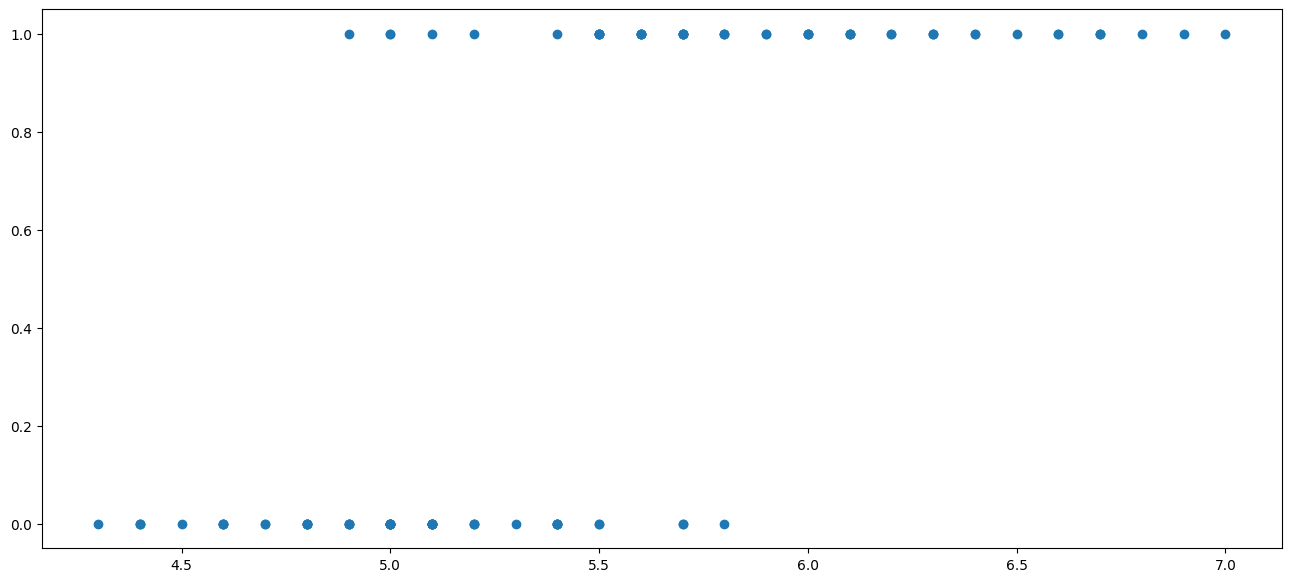

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = data.to_numpy()
X = data[:,0].reshape(-1,1)
Y = data[:,4].reshape(-1,1)

plt.figure(figsize=(16,7))
plt.scatter(X,Y)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("Iris.csv")
data = data[:100].to_numpy()
X = data[:,0].reshape(-1,1)
Y = data[:,4]

N = 100
X = np.hstack([X, np.ones((N, 1))])


epochs = 5000
lr = 0.01
m = 50
losses = []
thetas = np.random.randn(2,)

for epoch in range(epochs):
    for i in range(0, N, m):
        x = X[i:i + m, :]
        y = Y[i:i + m]
        y_hat = x.dot(thetas)
        loss = (y_hat - y)**2

        losses.append(np.mean((loss)))
        gradients = 2 * x.T.dot(y_hat - y) / m
        thetas -= lr * gradients

print(list(map(float, losses[::100])))
print("Final thetas:", thetas)


[0.002280291135409901, 0.5188573435839134, 0.4991969918838091, 0.4806187185296736, 0.46305955448609615, 0.44646031809356573, 0.4307653830753095, 0.41592246089310725, 0.40188239656011254, 0.3885989770742839, 0.37602875168816624, 0.36413086327962724, 0.35286689013397043, 0.3422006974908181, 0.33209829824942827, 0.32252772226388304, 0.31345889369499363, 0.30486351591897803, 0.2967149635240825, 0.2889881809555232, 0.281659587396486, 0.2747069874985804, 0.26810948759921294, 0.2618474170858946, 0.25590225458866817, 0.2502565587016524, 0.24489390295332128, 0.23979881476255702, 0.23495671813388186, 0.23035387986058853, 0.22597735901888721, 0.22181495954964622, 0.2178551857369581, 0.21408720040461024, 0.21050078566265323, 0.20708630604668676, 0.20383467390224233, 0.20073731687582583, 0.19778614738276057, 0.19497353393002814, 0.19229227417987993, 0.18973556964705263, 0.18729700192908408, 0.184970510375444, 0.1827503711070551, 0.18063117730323502, 0.17860782067825237, 0.17667547407449033, 0.17482

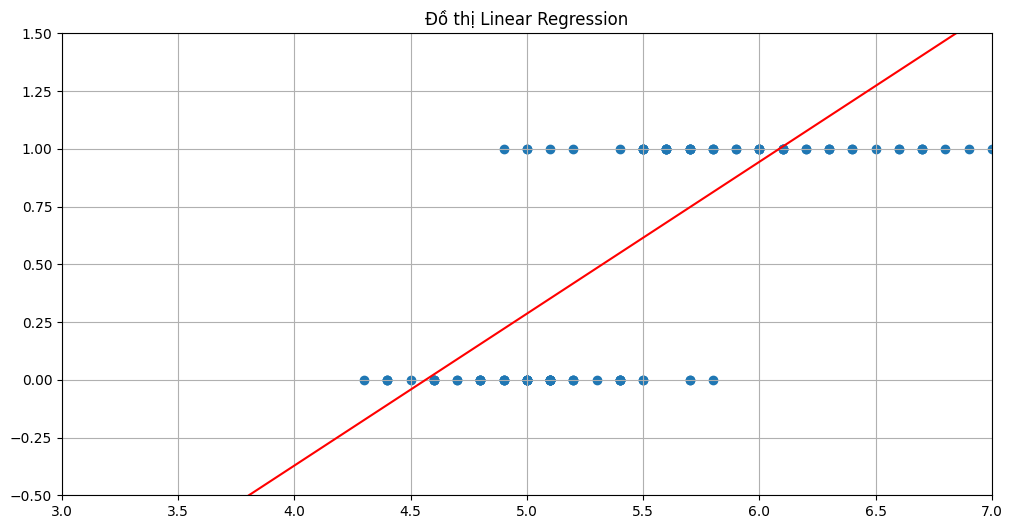

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))


plt.scatter(X[:, 0], Y)
x_line = np.arange(0,8,1)

plt.plot(x_line, thetas[0] * x_line + thetas[1], color='red')
plt.xlim(3,7)
plt.ylim(-0.5,1.5)
plt.title("Đồ thị Linear Regression")
plt.grid(True)
plt.show()


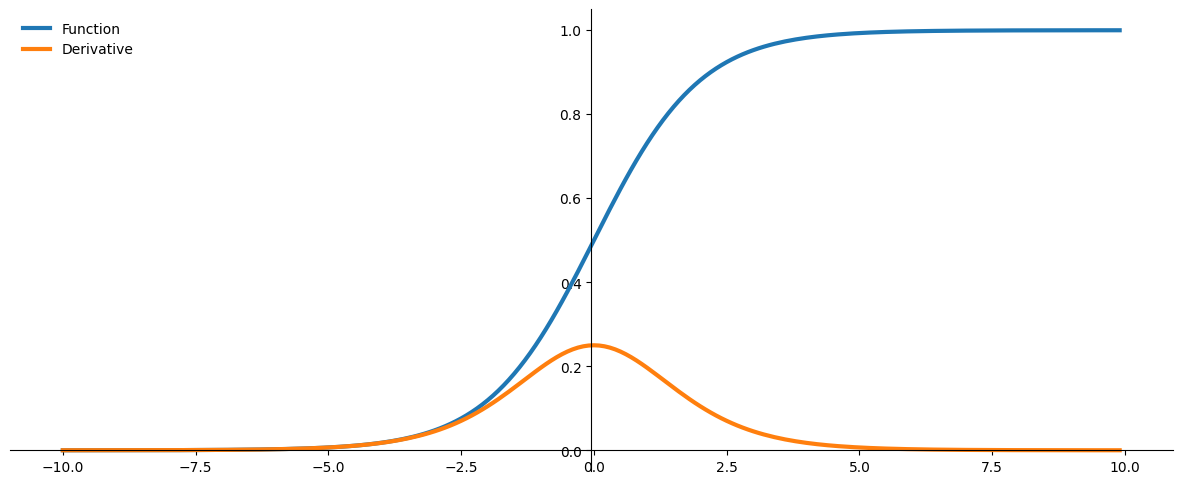

In [ ]:
import matplotlib.pyplot as plt
from math import *
import numpy as np

def plot_function_and_derivative(x, f_x, df_x):
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.plot(x, f_x, linewidth=3, label='Function')
    ax.plot(x, df_x, linewidth=3, label='Derivative')

    ax.legend(loc="upper left", frameon=False)
    plt.show()

def sigmoid(x):
    return 1/ ( 1 + exp(-x))

def d_sigmoid_1(x):
    return sigmoid(x)*(1-sigmoid(x))

x_data = np.arange(-10,10,0.1)

y_data = [sigmoid(x) for x in x_data]
dy_data = [d_sigmoid_1(x) for x in x_data]

plot_function_and_derivative(x_data, y_data, dy_data)

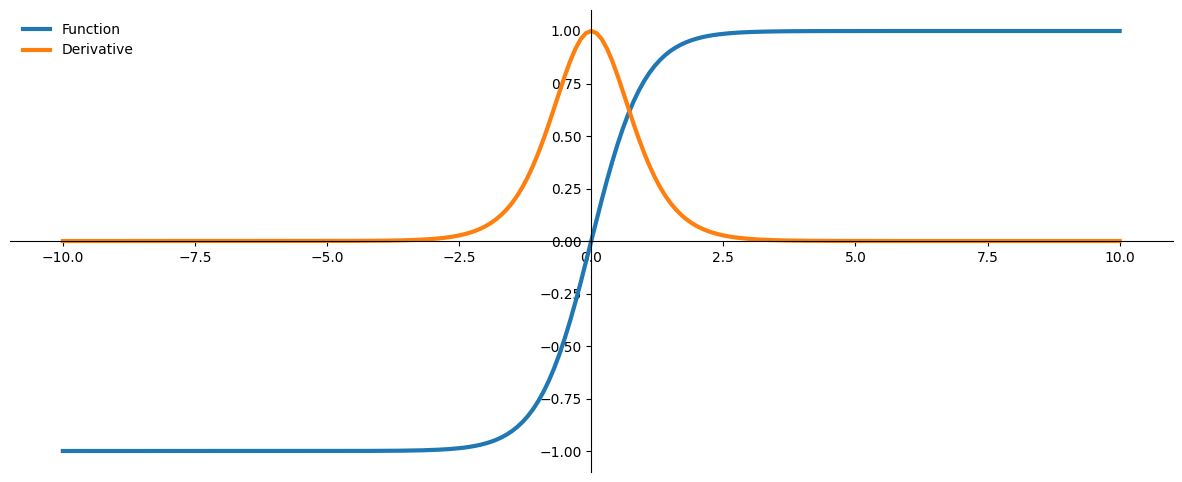

In [ ]:
def tanh(x):
    return (exp(x) - exp(-x)) / (exp(x) + exp(-x))

def d_tanh(x):
    result = 1 - tanh(x)**2
    return result

x_data = list(range(-100, 100+1, 1))
x_data = [x/10 for x in x_data]

y_data = [tanh(x) for x in x_data]
dy_data = [d_tanh(x) for x in x_data]

plot_function_and_derivative(x_data, y_data, dy_data)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("Iris.csv")
data = data[:100].to_numpy()
X = data[:,:4]
Y = data[:,4]


N = 100
X = np.hstack([X, np.ones((N, 1))])

def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(y_hat, y):
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def predict(X, theta):
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat


lr = 0.01
epoch = 100
m = 32

theta = np.random.randn(5,1)

losses = []
accs   = []

for _ in range(epoch):
    shuffled_indices = np.random.permutation(N)
    # shuffle dataset cho đa dạng
    X_b_shuffled     = X[shuffled_indices]
    y_shuffled       = Y[shuffled_indices]

    for i in range(0, N, m):
        xi = X_b_shuffled[i:i + m]
        yi = y_shuffled[i:i + m].reshape(-1,1)

        # compute output
        z = np.dot(xi, theta)
        y_hat = sigmoid_function(z)

        # compute loss
        loss = loss_function(y_hat, yi)

        # compute đạo hàm
        gradient = np.dot(xi.T, (y_hat - yi)) / yi.size

        # Cập nhật tham số
        theta -= lr*gradient


        losses.append(loss)
        preds = predict(xi, theta).round()
        acc = (preds == yi).mean()
        accs.append(acc)

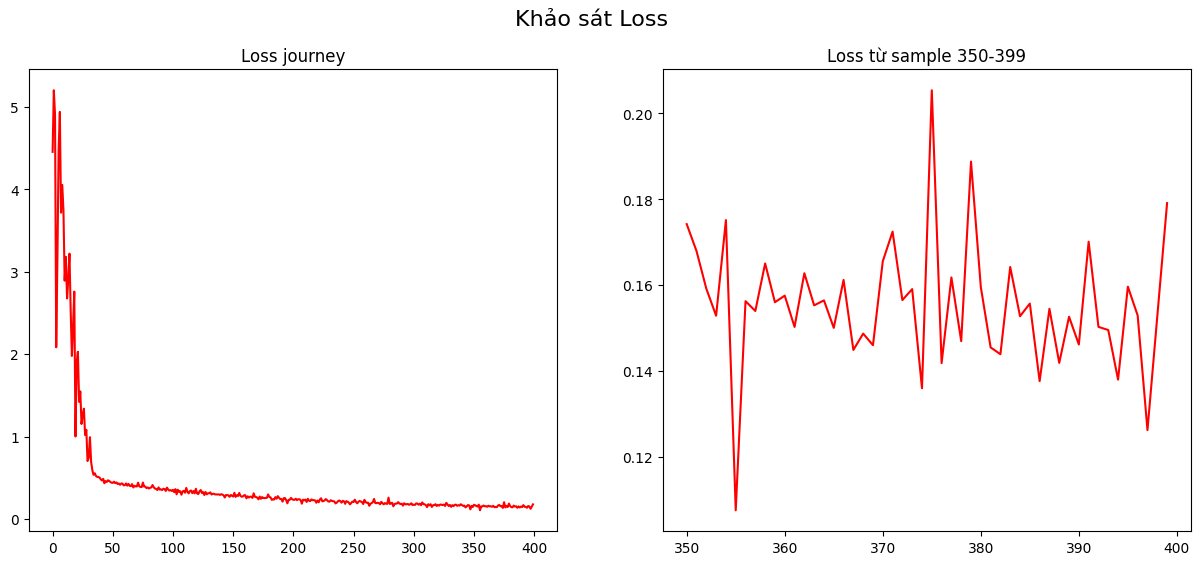

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("Khảo sát Loss", fontsize=16)

x_axis1 = list(range(400))
axes[0].plot(x_axis1, losses, color="r")
axes[0].set_title("Loss journey")

x_axis1 = list(range(350,400))
axes[1].plot(x_axis1, losses[350:], color="r")
axes[1].set_title("Loss từ sample 350-399")


plt.show()

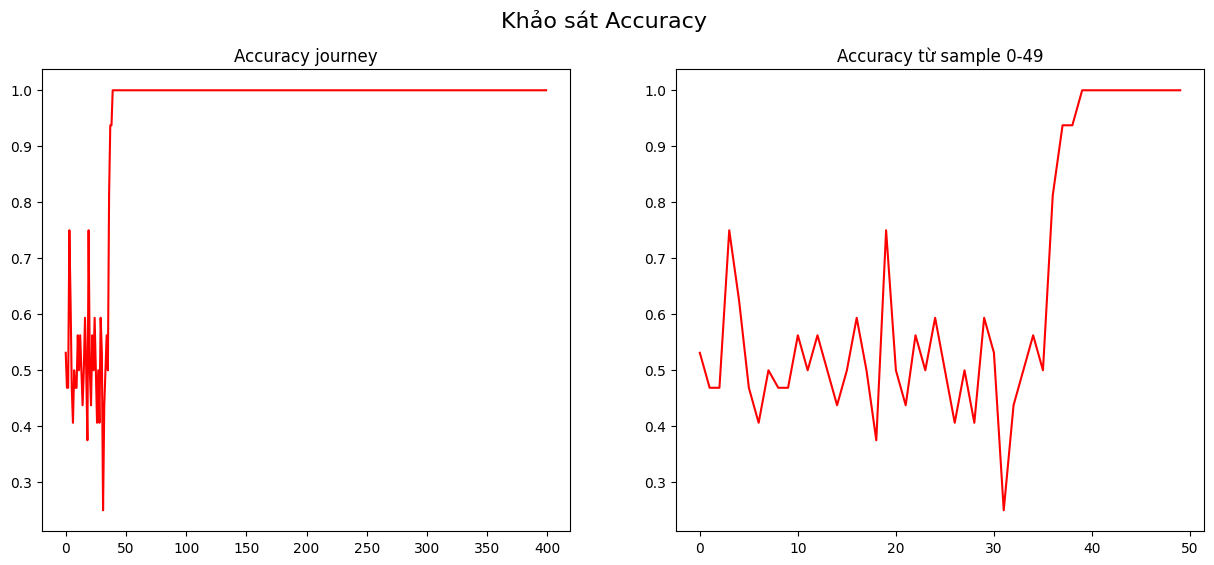

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("Khảo sát Accuracy", fontsize=16)

x_axis1 = list(range(400))
axes[0].plot(x_axis1, accs, color="r")
axes[0].set_title("Accuracy journey")

x_axis1 = list(range(50))
axes[1].plot(x_axis1, accs[:50], color="r")
axes[1].set_title("Accuracy từ sample 0-49")


plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("Iris.csv")
data = data[:100].to_numpy()
X = data[:,0].reshape(-1,1)
Y = data[:,4]

N = 100
X = np.hstack([X, np.ones((N, 1))])

def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(y_hat, y):
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def predict(X, theta):
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat


lr = 0.05
epoch = 4000
m = 32

theta = np.random.randn(2,1)

losses = []
accs   = []

for _ in range(epoch):
    shuffled_indices = np.random.permutation(N)
    X_b_shuffled     = X[shuffled_indices]
    y_shuffled       = Y[shuffled_indices]

    for i in range(0, N, m):
        xi = X_b_shuffled[i:i + m]
        yi = y_shuffled[i:i + m].reshape(-1,1)

        # compute output
        z = np.dot(xi, theta)
        y_hat = sigmoid_function(z)

        # compute loss
        loss = loss_function(y_hat, yi)

        # compute đạo hàm
        gradient = np.dot(xi.T, (y_hat - yi)) / yi.size

        # Cập nhật tham số
        theta -= lr*gradient

        losses.append(loss)
        preds = predict(xi, theta).round()
        acc = (preds == yi).mean()
        accs.append(acc)

print(theta)

[[  2.64841238]
 [-14.28519135]]


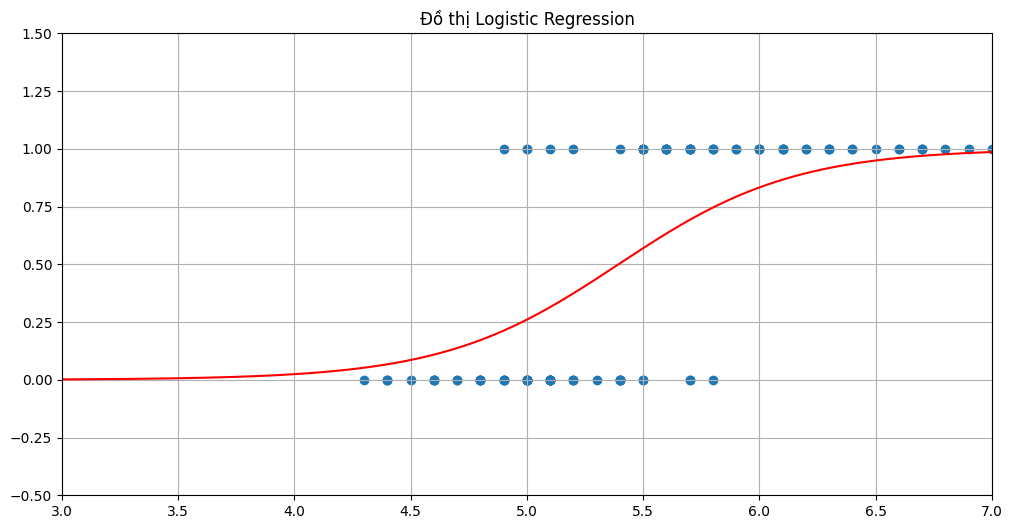

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))


plt.scatter(X[:, 0], Y)
x_line = np.arange(0,8,0.01)
w = theta[0, 0]
b = theta[1, 0]
plt.plot(x_line, sigmoid_function(w * x_line + b), color='red')
plt.xlim(3,7)
plt.ylim(-0.5,1.5)
plt.title("Đồ thị Logistic Regression")
plt.grid(True)
plt.show()
